In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptops.csv' , encoding='latin-1')
print(df.shape)

(1303, 13)


In [3]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Basic dataset exploration

In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

Columns Unamed and product were dropped as they don't contain any useful information for model training later. Laptop brands will be dropped for error prone prediction later, (doesnt make sense to have apple laptops running windows). This would ultimately be a GENERAL LAPTOP PRICE PREDICTOR.

In [5]:
df=df.drop(columns=['Unnamed: 0','Product','Company'])
df.head(10)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [6]:
df.isnull().sum() #no missing values

TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
df.dtypes

TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [8]:
explorecols=['TypeName','Cpu','Gpu','Inches','Ram','Memory','OpSys','Weight']

for i in explorecols:
    print("%-10s\n%-200s\n%-10d\n"%(i,df[i].unique(),df[i].nunique()))

TypeName  
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']                                                                                                                         
6         

Cpu       
['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5 7300HQ 2.5GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'Intel Core i5 1.6GHz'
 'Intel Core i7 8650U 1.9GHz' 'Intel Atom x5-Z8300 1.44GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD A6-Series 9220 2.5GHz'
 'Intel Celeron Dual Core N3350 1.1GHz' 'Intel Core i3 7130U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 2.0GHz'
 'AMD Ryzen 1700

# Feature engineering

In [9]:
#Extra feature "Touchscreen" was extracted (from the screenResolution column) and added to the dataset
#Laptops with touchscreen enabled displays are more costly than those without touchscreen capabilities
#(Personal opinion before EDA)

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 'yes' if 'Touchscreen' in x else 'no')
df.sample(5)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
296,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,979.0,no
383,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.5kg,1099.0,no
266,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD + 512GB SSD,Intel UHD Graphics 620,Windows 10,1.1kg,1499.0,yes
474,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,12GB,128GB SSD + 1TB HDD,Intel HD Graphics 530,Windows 10,2.06kg,1299.0,no
22,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.0,no


In [10]:
df['ScreenResolution']=df['ScreenResolution'].str.extract('(\d\d\d\d?x\d\d\d\d?)',expand=True)
df.tail(10)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
1293,Notebook,15.6,1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00,no
1294,Notebook,15.6,1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99,no
1295,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99,no
1296,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00,no
1297,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32,no
1298,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,yes
1299,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,yes
1300,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,no
1301,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,no
1302,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00,no


In [11]:
#Removal of units : GB,Kg

df['Ram']=df['Ram'].str.extract('(\d\d?)',expand=True)
df['Weight']=df['Weight'].str.extract('(\d\.\d\d?|\d)',expand=True)
df.head(6)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,no
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,no
2,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,no
3,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,no
4,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,no
5,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1,400.00,no


In [44]:
df['Ram'] = df['Ram'].astype('int32')

C:\Users\User\AppData\Local\Temp/ipykernel_6484/1977328478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].astype('int32')


In [46]:
df['Weight'] = df['Weight'].astype('float32')

C:\Users\User\AppData\Local\Temp/ipykernel_6484/528318470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].astype('float32')


Simplification of Cpu column

Intel cpus from dataset: intel i3, intel i5, intel i7, intel atom, intel celeron, intel pentium, intel xeon

AMD cpus from dataset: AMD E-series, AMD FX, AMD A4,A5,A6,A8,A9,A10,A12, AMD Ryzen

Others: Samsung

In [12]:
df['Cpu_copy']=0

#Intel processors
df.loc[df['Cpu'].str.contains('Core M'),'Cpu_copy']="Intel M "
df.loc[df['Cpu'].str.contains('Atom'),'Cpu_copy']="Intel Atom"
df.loc[df['Cpu'].str.contains('Celeron'),'Cpu_copy']="Intel Celeron"
df.loc[df['Cpu'].str.contains('Pentium'),'Cpu_copy']="Intel Pentium"
df.loc[df['Cpu'].str.contains('i3'),'Cpu_copy']="Intel i3"
df.loc[df['Cpu'].str.contains('i5'),'Cpu_copy']="Intel i5"
df.loc[df['Cpu'].str.contains('i7'),'Cpu_copy']="Intel i7"
df.loc[df['Cpu'].str.contains('Xeon'),'Cpu_copy']="Intel Xeon"


#AMD processors
df.loc[df['Cpu'].str.contains('AMD E-Series'),'Cpu_copy']="AMD E"
df.loc[df['Cpu'].str.contains('AMD FX'),'Cpu_copy']="AMD FX"
df.loc[df['Cpu'].str.contains('AMD A4'),'Cpu_copy']="AMD A4"
df.loc[df['Cpu'].str.contains('AMD A6'),'Cpu_copy']="AMD A6"
df.loc[df['Cpu'].str.contains('AMD A8'),'Cpu_copy']="AMD A8"
df.loc[df['Cpu'].str.contains('AMD A9'),'Cpu_copy']="AMD A9"
df.loc[df['Cpu'].str.contains('AMD A10'),'Cpu_copy']="AMD A10"
df.loc[df['Cpu'].str.contains('AMD A12'),'Cpu_copy']="AMD A12"
df.loc[df['Cpu'].str.contains('AMD Ryzen'),'Cpu_copy']="AMD Ryzen"



#Samsung processors
df.loc[df['Cpu'].str.contains('Samsung'),'Cpu_copy']="Samsung"

In [13]:
df['Cpu']=df['Cpu_copy']
df.drop(columns=['Cpu_copy'],inplace=True)
df.head(5)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Ultrabook,13.3,2560x1600,Intel i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,no
1,Ultrabook,13.3,1440x900,Intel i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,no
2,Notebook,15.6,1920x1080,Intel i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,no
3,Ultrabook,15.4,2880x1800,Intel i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,no
4,Ultrabook,13.3,2560x1600,Intel i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,no


Based on the dataset, laptops have four types of storage medium (SSD , HDD, Flash Storage, SSHD(Hybrid)). Therefore four separate columns/features were created for the each type of memory configuration. The config (SSD + SSD) will be dealt later.

In [19]:
#dealing with memory
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\User\AppData\Local\Temp/ipykernel_6484/3624774569.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\User\AppData\Local\Temp/ipykernel_6484/3624774569.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [20]:
df.head()

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
0,Ultrabook,13.3,2560x1600,Intel i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,no,0,128,0,0
1,Ultrabook,13.3,1440x900,Intel i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,no,0,0,0,128
2,Notebook,15.6,1920x1080,Intel i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,no,0,256,0,0
3,Ultrabook,15.4,2880x1800,Intel i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,no,0,512,0,0
4,Ultrabook,13.3,2560x1600,Intel i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,no,0,256,0,0


In [21]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
0,Ultrabook,13.3,2560x1600,Intel i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,no,0,128,0,0
1,Ultrabook,13.3,1440x900,Intel i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,no,0,0,0,128
2,Notebook,15.6,1920x1080,Intel i5,8,Intel HD Graphics 620,No OS,1.86,575.00,no,0,256,0,0
3,Ultrabook,15.4,2880x1800,Intel i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,no,0,512,0,0
4,Ultrabook,13.3,2560x1600,Intel i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,no,0,256,0,0


In [22]:
#gpu
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Ultrabook,13.3,2560x1600,Intel i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,no,0,128,0,0,Intel
1,Ultrabook,13.3,1440x900,Intel i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,no,0,0,0,128,Intel
2,Notebook,15.6,1920x1080,Intel i5,8,Intel HD Graphics 620,No OS,1.86,575.00,no,0,256,0,0,Intel
3,Ultrabook,15.4,2880x1800,Intel i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,no,0,512,0,0,AMD
4,Ultrabook,13.3,2560x1600,Intel i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,no,0,256,0,0,Intel


In [23]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_euros,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,1339.69,no,0,128,0,0,Intel
1,Ultrabook,13.3,1440x900,Intel i5,8,macOS,1.34,898.94,no,0,0,0,128,Intel
2,Notebook,15.6,1920x1080,Intel i5,8,No OS,1.86,575.00,no,0,256,0,0,Intel
3,Ultrabook,15.4,2880x1800,Intel i7,16,macOS,1.83,2537.45,no,0,512,0,0,AMD
4,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,1803.60,no,0,256,0,0,Intel


# EDA

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

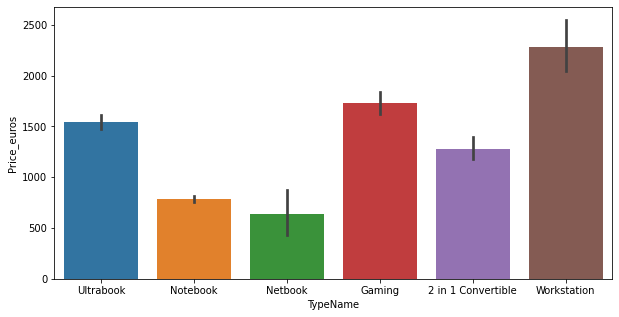

In [25]:
plt.subplots(figsize=(10,5))
sns.barplot(x='TypeName',y='Price_euros',data=df)

As can be seen, on average, workstation laptops are higher priced than other category of laptops. This is to be expected as workstation laptops have higher spec configurations (better cpu, more memory, faster clockspeed, etc) to meet the demands of clients in the proffesional workspace.

Gaming laptops present the second highest priced category of laptops due to the same reasons as above.

Ultrabooks and 2 in 1 convertibles are cheaper than gaming laptops (on average).

Notebooks and netbooks are relatively cheaper than other category of laptops.

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

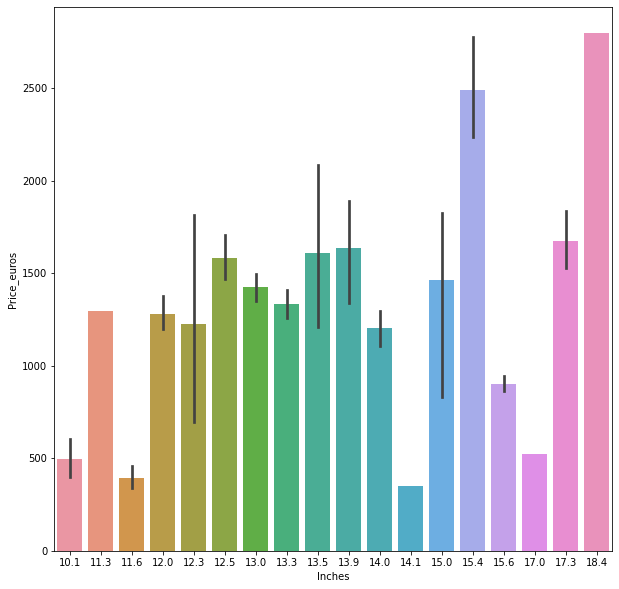

In [27]:
plt.subplots(figsize=(10,10))
sns.barplot(x='Inches',y='Price_euros',data=df)

Here we can see that the price of laptops can't solely be judge through the size of their displays (no direct linear correlation between screen size and price). This feature will still be kept for modelling later (high variance).

<AxesSubplot:xlabel='ScreenResolution', ylabel='Price_euros'>

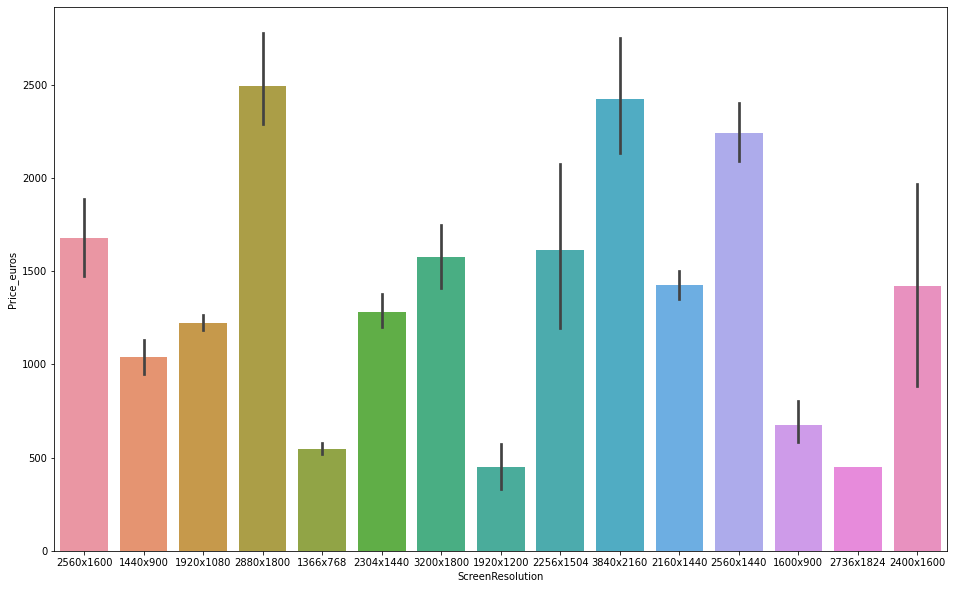

In [28]:
plt.subplots(figsize=(16,10))
sns.barplot(x='ScreenResolution',y='Price_euros',data=df)

Screens have higher resolutions are generally higher priced. However , an outlier resolution , specifically (2736 * 1824) is lower priced than others.

In [31]:
resolutionList = list(df['ScreenResolution'].unique())

print("%-20s%s"%("Resoltuion","Count"))
for i in resolutionList:
    print("%-20s%d"%(i,list(df['ScreenResolution']).count(i)))

Resoltuion          Count
2560x1600           6
1440x900            4
1920x1080           841
2880x1800           4
1366x768            308
2304x1440           6
3200x1800           27
1920x1200           5
2256x1504           6
3840x2160           43
2160x1440           2
2560x1440           23
1600x900            23
2400x1600           4


Since there's only 1 laptop with outlier resolution (2736 x 1824), this laptop would be removed.

In [30]:
#REmoval of laptop with outlier resolution
df = df.loc[~df['ScreenResolution'].str.contains('2736x1824')]
df['ScreenResolution'].unique()
print(df.shape)

(1302, 14)


<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

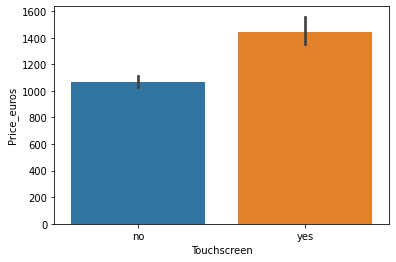

In [34]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

Laptops with touchscreen capabilities are priced higher on average.

<AxesSubplot:xlabel='Cpu', ylabel='Price_euros'>

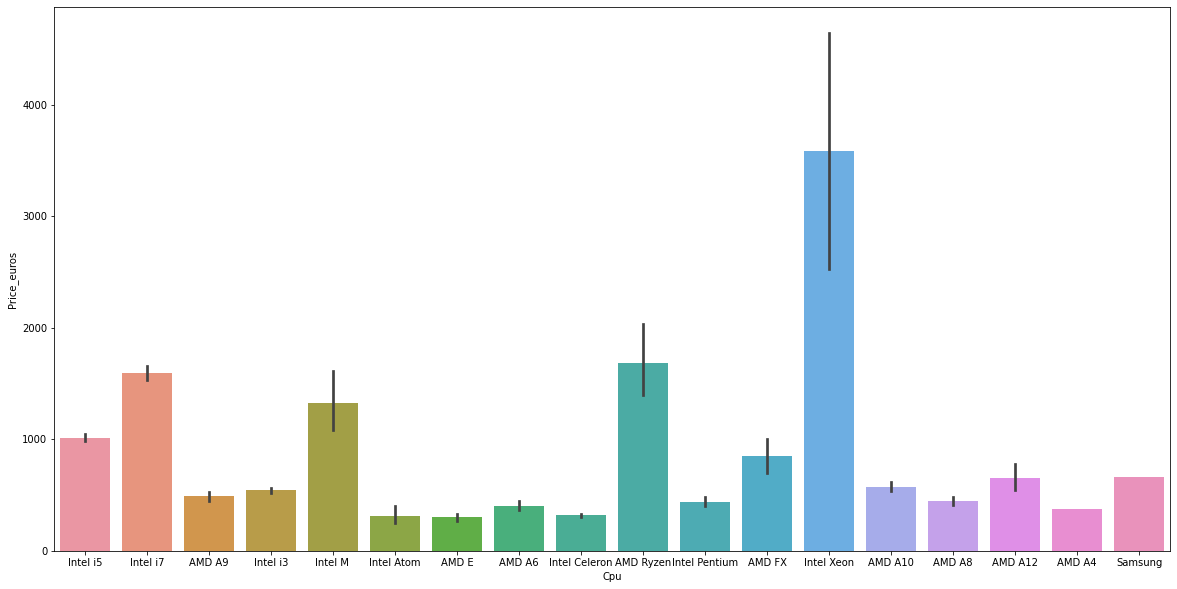

In [35]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Cpu',y='Price_euros',data=df)

Higher powered processors/CPU are generally higher priced (Xeon > i7>i5>i3). The same goes for AMD CPus (Ryzen > AMD A series> E series...). Interestingly, laptops with intel M processors are higher priced than intel i5 processors (which is not expected as intel core M processors are lower powered CPUs).

In [36]:
standby_df = df.loc[df['Cpu'].str.contains('Intel M |Intel i5')]
standby_df.groupby(['Cpu']).mean()

,Inches,Price_euros,HDD,SSD,Hybrid,Flash_Storage
Cpu,,,,,,
Intel M,12.521053,1324.231579,0.000000,255.157895,0.000000,87.578947
Intel i5,14.802600,1015.015248,327.725768,159.659574,5.929078,3.026005


As shown above, Intel M laptops a higher average in RAM capacity and SSD capacity than Intel i5 laptops. Intel M laptops are also much lighter than Intel i5 laptops. These factors contribute to the higher average prices for intel M laptops.

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

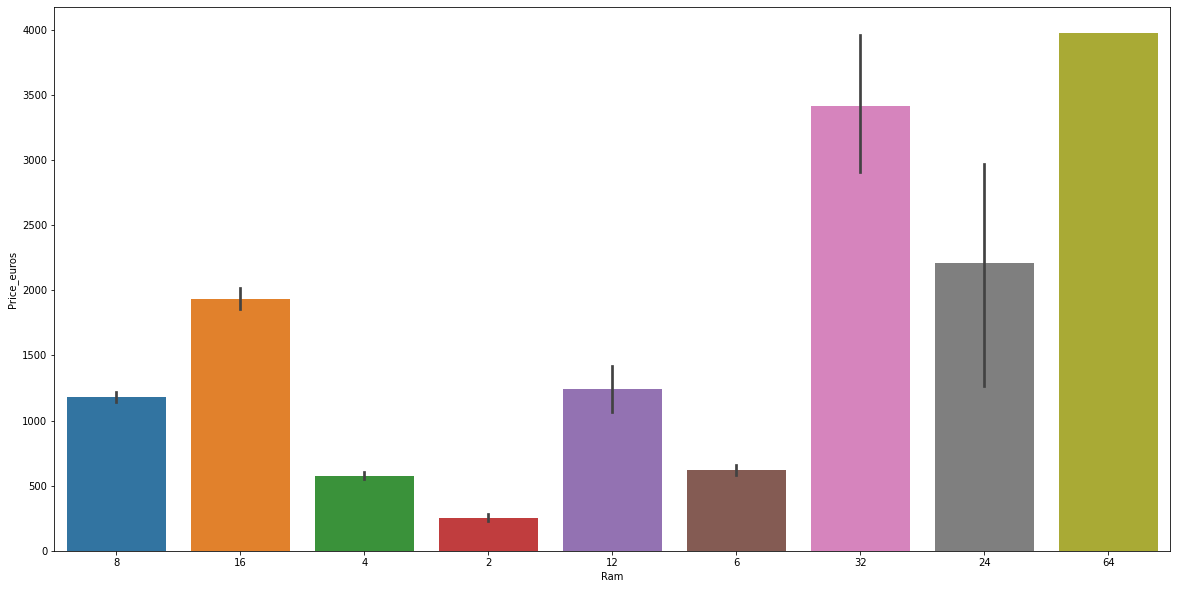

In [37]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Ram',y='Price_euros',data=df)

laptops with higher ram shows higher prices

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

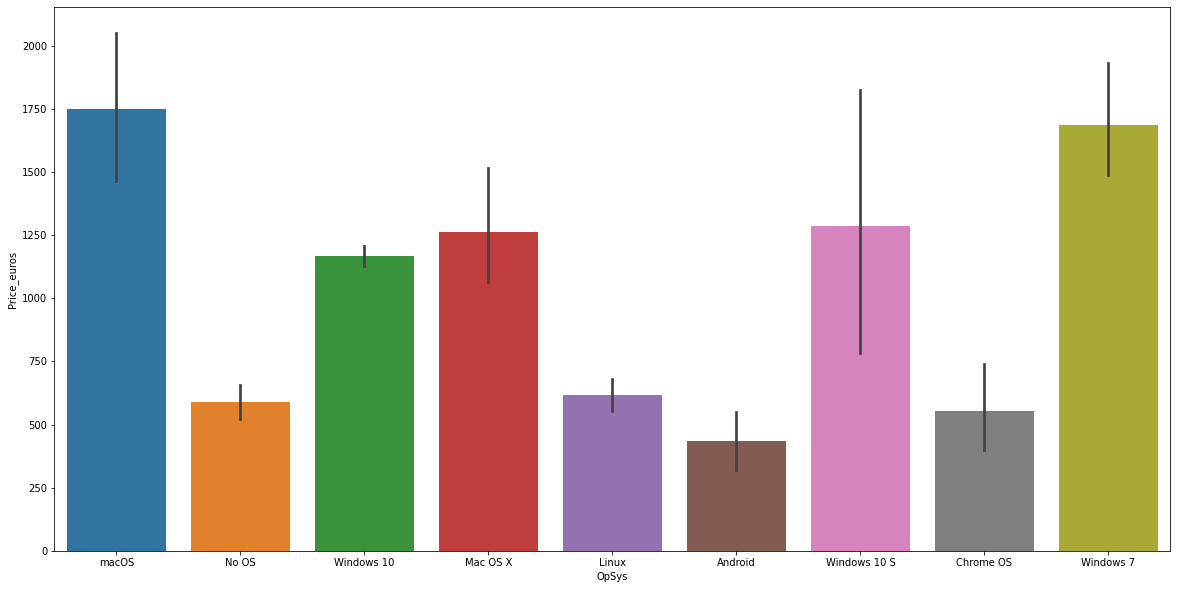

In [38]:
plt.subplots(figsize=(20,10))
sns.barplot(x='OpSys',y='Price_euros',data=df)

In [39]:
df.corr()

,Inches,Price_euros,HDD,SSD,Hybrid,Flash_Storage
Inches,1.000000,0.066901,0.530468,-0.109364,0.054003,-0.227583
Price_euros,0.066901,1.000000,-0.097095,0.670559,0.007921,-0.039126
HDD,0.530468,-0.097095,1.000000,-0.400750,-0.076674,-0.116649
SSD,-0.109364,0.670559,-0.400750,1.000000,-0.059845,-0.146779
Hybrid,0.054003,0.007921,-0.076674,-0.059845,1.000000,-0.014246
Flash_Storage,-0.227583,-0.039126,-0.116649,-0.146779,-0.014246,1.000000


<AxesSubplot:>

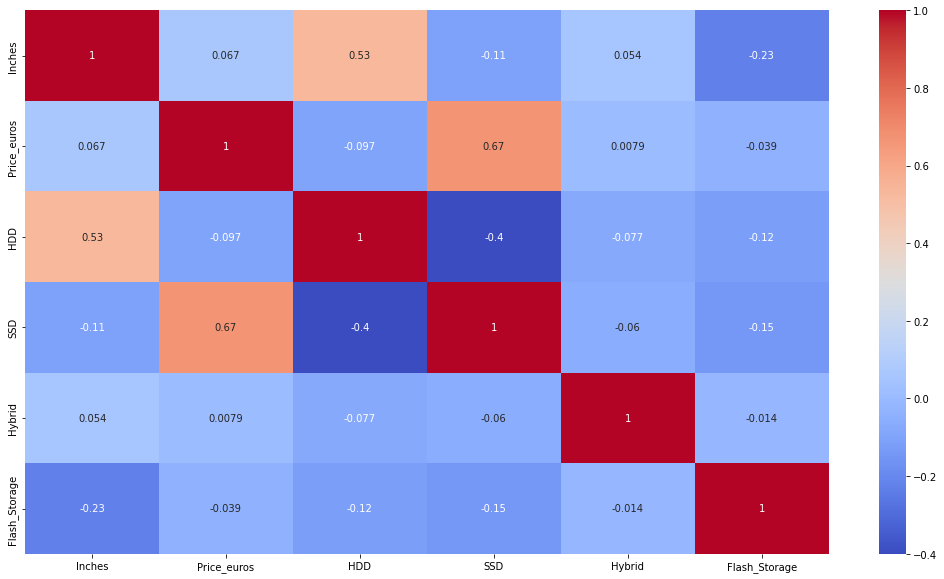

In [41]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

# Data preprocessing

In [47]:
df.dtypes

TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
OpSys                object
Weight              float32
Price_euros         float64
Touchscreen          object
HDD                   int64
SSD                   int64
Hybrid                int64
Flash_Storage         int64
Gpu_brand            object
dtype: object

In [48]:
#Prints all columns that are of type object

for i in df.columns:
     if df[i].dtype=='object':
             print("%-10s\n%-200s\n%-10d\n"%(i,df[i].unique(),df[i].nunique()))

TypeName  
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']                                                                                                                         
6         

ScreenResolution
['2560x1600' '1440x900' '1920x1080' '2880x1800' '1366x768' '2304x1440'
 '3200x1800' '1920x1200' '2256x1504' '3840x2160' '2160x1440' '2560x1440'
 '1600x900' '2400x1600']                                
14        

Cpu       
['Intel i5' 'Intel i7' 'AMD A9' 'Intel i3' 'Intel M ' 'Intel Atom' 'AMD E'
 'AMD A6' 'Intel Celeron' 'AMD Ryzen' 'Intel Pentium' 'AMD FX'
 'Intel Xeon' 'AMD A10' 'AMD A8' 'AMD A12' 'AMD A4' 'Samsung']
18        

OpSys     
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']                                                                                                     
9         

Touchscreen
['no' 'yes']                                                                          

In [50]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

print(df['Touchscreen'].unique())
print(le.fit_transform(df['Touchscreen'].unique())) # to check what encoded values would be

['no' 'yes']
[0 1]


In [52]:
df['Touchscreen']=le.fit_transform(df['Touchscreen'])
df.tail()

C:\Users\User\AppData\Local\Temp/ipykernel_6484/1020202288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Touchscreen']=le.fit_transform(df['Touchscreen'])


,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_euros,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
1298,2 in 1 Convertible,14.0,1920x1080,Intel i7,4,Windows 10,1.80,638.0,1,0,128,0,0,Intel
1299,2 in 1 Convertible,13.3,3200x1800,Intel i7,16,Windows 10,1.30,1499.0,1,0,512,0,0,Intel
1300,Notebook,14.0,1366x768,Intel Celeron,2,Windows 10,1.50,229.0,0,0,0,0,64,Intel
1301,Notebook,15.6,1366x768,Intel i7,6,Windows 10,2.19,764.0,0,1000,0,0,0,AMD
1302,Notebook,15.6,1366x768,Intel Celeron,4,Windows 10,2.20,369.0,0,500,0,0,0,Intel


One Hot encoding will be used to preprocess nominal columns with low cardinality (TypeName and OpSYs will be one hot encoded)

In [53]:
pd.DataFrame(df['TypeName'])

,TypeName
0,Ultrabook
1,Ultrabook
2,Notebook
3,Ultrabook
4,Ultrabook
...,...
1298,2 in 1 Convertible
1299,2 in 1 Convertible
1300,Notebook
1301,Notebook


In [54]:
dummTypeName = pd.get_dummies(df['TypeName'])
dummTypeName

,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1298,1,0,0,0,0,0
1299,1,0,0,0,0,0
1300,0,0,0,1,0,0
1301,0,0,0,1,0,0


In [55]:
dummOpSys = pd.get_dummies(df['OpSys'])
dummOpSys

,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,0,0,0
1299,0,0,0,0,0,1,0,0,0
1300,0,0,0,0,0,1,0,0,0
1301,0,0,0,0,0,1,0,0,0


In [56]:
df.drop(columns=['TypeName','OpSys'],inplace=True)
OH_df = pd.concat([df,dummTypeName,dummOpSys], axis=1)

pd.set_option('display.max_columns', None)
OH_df.head()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Inches,ScreenResolution,Cpu,Ram,Weight,Price_euros,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,2560x1600,Intel i5,8,1.37,1339.69,0,0,128,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,13.3,1440x900,Intel i5,8,1.34,898.94,0,0,0,0,128,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,15.6,1920x1080,Intel i5,8,1.86,575.00,0,0,256,0,0,Intel,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,15.4,2880x1800,Intel i7,16,1.83,2537.45,0,0,512,0,0,AMD,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,13.3,2560x1600,Intel i5,8,1.37,1803.60,0,0,256,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [59]:
OH_df['LaptopPrice']=OH_df['Price_euros']
OH_df.drop(columns=['Price_euros'],inplace = True)
OH_df

,Inches,ScreenResolution,Cpu,Ram,Weight,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,LaptopPrice
0,13.3,2560x1600,Intel i5,8,1.37,0,0,128,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1339.69
1,13.3,1440x900,Intel i5,8,1.34,0,0,0,0,128,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,898.94
2,15.6,1920x1080,Intel i5,8,1.86,0,0,256,0,0,Intel,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,575.00
3,15.4,2880x1800,Intel i7,16,1.83,0,0,512,0,0,AMD,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2537.45
4,13.3,2560x1600,Intel i5,8,1.37,0,0,256,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1920x1080,Intel i7,4,1.80,1,0,128,0,0,Intel,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,638.00
1299,13.3,3200x1800,Intel i7,16,1.30,1,0,512,0,0,Intel,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1499.00
1300,14.0,1366x768,Intel Celeron,2,1.50,0,0,0,0,64,Intel,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,229.00
1301,15.6,1366x768,Intel i7,6,2.19,0,1000,0,0,0,AMD,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,764.00


Label encoding would be used to encode ScreenResolution column as order matters (low res to high res)

In [60]:
Screen_Res_dict={'1366x768' : 1, '1440x900' : 2 , '1600x900': 3, '1920x1080': 4, '1920x1200': 5, '2160x1440': 6, 
                 '2304x1440': 7, '2256x1504': 8, '2560x1440': 9, '2400x1600':10, '2560x1600':11, '2880x1800':12, 
                  '3200x1800': 13, '3840x2160':14}

OH_df['ScreenResolution'] = OH_df.ScreenResolution.map(Screen_Res_dict)

OH_df

,Inches,ScreenResolution,Cpu,Ram,Weight,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,LaptopPrice
0,13.3,11,Intel i5,8,1.37,0,0,128,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1339.69
1,13.3,2,Intel i5,8,1.34,0,0,0,0,128,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,898.94
2,15.6,4,Intel i5,8,1.86,0,0,256,0,0,Intel,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,575.00
3,15.4,12,Intel i7,16,1.83,0,0,512,0,0,AMD,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2537.45
4,13.3,11,Intel i5,8,1.37,0,0,256,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,Intel i7,4,1.80,1,0,128,0,0,Intel,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,638.00
1299,13.3,13,Intel i7,16,1.30,1,0,512,0,0,Intel,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1499.00
1300,14.0,1,Intel Celeron,2,1.50,0,0,0,0,64,Intel,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,229.00
1301,15.6,1,Intel i7,6,2.19,0,1000,0,0,0,AMD,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,764.00


Label encoding applies to CPU as well

In [61]:
Cpu_list = list(OH_df['Cpu'].unique())

Cpu_le = list(le.fit_transform(OH_df['Cpu'].unique()))

for i in range(0, len(Cpu_list)):
    print("%-20s%d"%(Cpu_list[i], Cpu_le[i]))

Intel i5            15
Intel i7            16
AMD A9              5
Intel i3            14
Intel M             11
Intel Atom          9
AMD E               6
AMD A6              3
Intel Celeron       10
AMD Ryzen           8
Intel Pentium       12
AMD FX              7
Intel Xeon          13
AMD A10             0
AMD A8              4
AMD A12             1
AMD A4              2
Samsung             17


In [62]:
OH_df['Cpu'] = le.fit_transform(OH_df['Cpu'])
OH_df

,Inches,ScreenResolution,Cpu,Ram,Weight,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,LaptopPrice
0,13.3,11,15,8,1.37,0,0,128,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1339.69
1,13.3,2,15,8,1.34,0,0,0,0,128,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,898.94
2,15.6,4,15,8,1.86,0,0,256,0,0,Intel,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,575.00
3,15.4,12,16,16,1.83,0,0,512,0,0,AMD,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2537.45
4,13.3,11,15,8,1.37,0,0,256,0,0,Intel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,16,4,1.80,1,0,128,0,0,Intel,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,638.00
1299,13.3,13,16,16,1.30,1,0,512,0,0,Intel,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1499.00
1300,14.0,1,10,2,1.50,0,0,0,0,64,Intel,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,229.00
1301,15.6,1,16,6,2.19,0,1000,0,0,0,AMD,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,764.00


Label encoding applies to Gpu_brand as well

In [63]:
Gpu_list = list(OH_df['Gpu_brand'].unique())

Gpu_le = list(le.fit_transform(OH_df['Gpu_brand'].unique()))

for i in range(0, len(Gpu_list)):
    print("%-20s%d"%(Gpu_list[i], Cpu_le[i]))

Intel               15
AMD                 16
Nvidia              5
ARM                 14


In [64]:
OH_df['Gpu_brand'] = le.fit_transform(OH_df['Gpu_brand'])
OH_df

,Inches,ScreenResolution,Cpu,Ram,Weight,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,LaptopPrice
0,13.3,11,15,8,1.37,0,0,128,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1339.69
1,13.3,2,15,8,1.34,0,0,0,0,128,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,898.94
2,15.6,4,15,8,1.86,0,0,256,0,0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,575.00
3,15.4,12,16,16,1.83,0,0,512,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2537.45
4,13.3,11,15,8,1.37,0,0,256,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,16,4,1.80,1,0,128,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,638.00
1299,13.3,13,16,16,1.30,1,0,512,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1499.00
1300,14.0,1,10,2,1.50,0,0,0,0,64,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,229.00
1301,15.6,1,16,6,2.19,0,1000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,764.00


In [65]:
OH_df.to_csv('final_data.csv',index=False)

# Modeling

In [66]:
df= pd.read_csv('final_data.csv')
target = df['LaptopPrice']
df.drop(columns=['LaptopPrice'], inplace = True)
pd.set_option('display.max_columns', None)
df

,Inches,ScreenResolution,Cpu,Ram,Weight,Touchscreen,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,11,15,8,1.37,0,0,128,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,13.3,2,15,8,1.34,0,0,0,0,128,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,15.6,4,15,8,1.86,0,0,256,0,0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,15.4,12,16,16,1.83,0,0,512,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,13.3,11,15,8,1.37,0,0,256,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,14.0,4,16,4,1.80,1,0,128,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1298,13.3,13,16,16,1.30,1,0,512,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1299,14.0,1,10,2,1.50,0,0,0,0,64,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1300,15.6,1,16,6,2.19,0,1000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [70]:
print(df['HDD'].unique())
print(df['SSD'].unique())
print(df['Hybrid'].unique())
print(df['Flash_Storage'].unique())

[   0  500 1000 2000   32  128]
[ 128    0  256  512   32   64 1000 1024   16  768  180  240    8]
[   0 1000  508]
[  0 128 256  32  64  16 512]


# Splitting data

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=0)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def get_mae_random(max_leaf_nodes,X_train, X_test, y_train, y_test ):
    model1 = RandomForestRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model1.fit(X_train,y_train)
    model1_preds = model1.predict(X_test)
    print("R2 score: %.2f"%(r2_score(y_test,model1_preds)))
    mae = mean_absolute_error(y_test, model1_preds)
    return (mae)

for max_leaf_nodes in [5,10,20,50,100,200,300, 500]:
    mae = get_mae_random(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes: %d \t\t MAE: %d\n"%(max_leaf_nodes, mae))

R2 score: 0.62
Max leaf nodes: 5 		 MAE: 292

R2 score: 0.69
Max leaf nodes: 10 		 MAE: 256

R2 score: 0.72
Max leaf nodes: 20 		 MAE: 237

R2 score: 0.73
Max leaf nodes: 50 		 MAE: 220

R2 score: 0.73
Max leaf nodes: 100 		 MAE: 214

R2 score: 0.73
Max leaf nodes: 200 		 MAE: 213

R2 score: 0.73
Max leaf nodes: 300 		 MAE: 212

R2 score: 0.73
Max leaf nodes: 500 		 MAE: 213



In [73]:
from sklearn.tree import DecisionTreeRegressor

def get_mae_decision(max_leaf_nodes,X_train, X_test, y_train, y_test ):
    model1 = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model1.fit(X_train,y_train)
    model1_preds = model1.predict(X_test)
    print("R2 score: %.2f"%(r2_score(y_test,model1_preds)))
    mae = mean_absolute_error(y_test, model1_preds)
    return (mae)

for max_leaf_nodes in [5,10,20,50,100,200,300, 500]:
    mae = get_mae_decision(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes: %d \t\t MAE: %d\n"%(max_leaf_nodes, mae))

R2 score: 0.56
Max leaf nodes: 5 		 MAE: 321

R2 score: 0.66
Max leaf nodes: 10 		 MAE: 273

R2 score: 0.67
Max leaf nodes: 20 		 MAE: 265

R2 score: 0.68
Max leaf nodes: 50 		 MAE: 249

R2 score: 0.69
Max leaf nodes: 100 		 MAE: 241

R2 score: 0.68
Max leaf nodes: 200 		 MAE: 239

R2 score: 0.68
Max leaf nodes: 300 		 MAE: 243

R2 score: 0.68
Max leaf nodes: 500 		 MAE: 243



In [74]:
from sklearn.linear_model import LinearRegression

model2=LinearRegression()

model2.fit(X_train,y_train)

preds=model2.predict(X_test)

r2score=r2_score(y_test,preds)
MAE = mean_absolute_error(y_test, preds)

print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))

R2 score: 0.75
MAE: 253


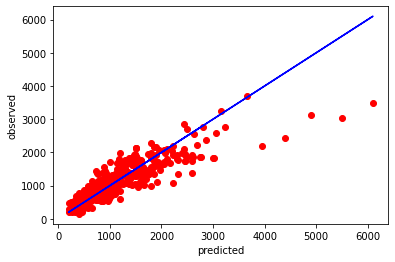

In [75]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
 

plt.xlabel('predicted')
plt.ylabel('observed')


plt.scatter(y_test,preds, color='red')
plt.plot(y_test,y_test, color='blue')

In [79]:
from xgboost import XGBRegressor

model3 = XGBRegressor()

model3.fit(X_train,y_train)

preds3=model3.predict(X_test)

r2score=r2_score(y_test, preds3)
MAE = mean_absolute_error(y_test, preds3)

print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))

R2 score: 0.75
MAE: 210


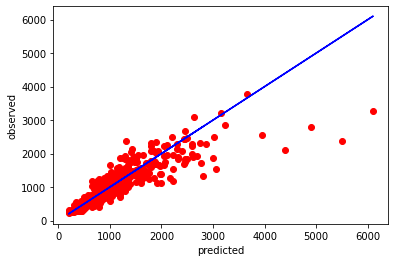

In [80]:
fig, ax= plt.subplots()
plt.xlabel('predicted')
plt.ylabel('observed')


plt.scatter(y_test,preds3, color='red')
plt.plot(y_test,y_test, color='blue')

Model using XGBoost will be selected, due to lower MAE score and higher R2